In [3]:
import pandas as pd
import numpy as np
from pathlib import Path

%load_ext autoreload
%autoreload 2
from base import datahandler, prediction_models, evaluation


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# Define the directory paths
challenge_data_dir = Path('dataset/phase_1/')
data_dir = challenge_data_dir / "train"
labels_dir = challenge_data_dir / 'train_labels.csv'

split_dataframes = datahandler.load_and_prepare_dataframes(data_dir, labels_dir)

some_dataframes = {df_k : split_dataframes[df_k] for df_k in list(split_dataframes.keys())[:10]}

In [1]:
input_features = ['Eccentricity', 'Semimajor Axis (m)', 'Inclination (deg)', 'RAAN (deg)',
       'Argument of Periapsis (deg)', 'True Anomaly (deg)', 'Latitude (deg)',
       'Longitude (deg)', 'Altitude (m)', 'X (m)', 'Y (m)', 'Z (m)',
       'Vx (m/s)', 'Vy (m/s)', 'Vz (m/s)']

input_features_reduced = ['Eccentricity', 'Semimajor Axis (m)', 'Inclination (deg)', 'RAAN (deg)',
       'Argument of Periapsis (deg)', 'True Anomaly (deg)', 'Latitude (deg)',
       'Longitude (deg)', 'Altitude (m)']

label_features=['EW_Node_Location']


ds_gen = datahandler.DatasetGenerator(split_df=some_dataframes, input_features=input_features_reduced,
                                      label_features=label_features,
                                      train_val_split=0.85, stride=1, padding=False,
                                      input_history_steps=40, input_future_steps=40, seed=69)

NameError: name 'datahandler' is not defined

In [5]:
train_combined, val_combined = ds_gen.get_datasets(512, label_features=label_features, shuffle=True)
print(train_combined.element_spec)

(TensorSpec(shape=(None, 80, 9), dtype=tf.float64, name=None), {'EW_Node_Location': TensorSpec(shape=(None,), dtype=tf.int32, name=None)})


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 80, 9)]           0         
                                                                 
 conv1d_2 (Conv1D)           (None, 33, 64)            27712     
                                                                 
 conv1d_3 (Conv1D)           (None, 2, 32)             65568     
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 EW_Node_Location (Dense)    (None, 2)                 66    

2024-01-06 23:34:24.223191: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1028534400 exceeds 10% of free system memory.


Epoch 1/50


2024-01-06 23:34:27.753182: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-01-06 23:34:29.750381: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.08GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-01-06 23:34:29.864874: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.08GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-01-06 23:34:30.154334: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fdb18021770 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-06 23:34:30.154390: I external/local_xla/xla/service/service.

  1/349 [..............................] - ETA: 45:40 - loss: 0.7220 - accuracy: 0.0996

2024-01-06 23:34:32.284894: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.65GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-01-06 23:34:32.325701: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.65GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


349/349 [==============================] - ETA: 0s - loss: 0.0137 - accuracy: 0.9969

2024-01-06 23:34:39.271896: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.54GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-01-06 23:34:39.305045: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.54GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


349/349 [==============================] - 16s 24ms/step - loss: 0.0137 - accuracy: 0.9969 - val_loss: 0.0026 - val_accuracy: 0.9997
Epoch 2/50
349/349 [==============================] - 7s 21ms/step - loss: 0.0033 - accuracy: 0.9995 - val_loss: 0.0023 - val_accuracy: 0.9997
Epoch 3/50
349/349 [==============================] - 7s 21ms/step - loss: 0.0031 - accuracy: 0.9995 - val_loss: 0.0021 - val_accuracy: 0.9997
Epoch 4/50
349/349 [==============================] - 8s 22ms/step - loss: 0.0032 - accuracy: 0.9995 - val_loss: 0.0022 - val_accuracy: 0.9997
Epoch 5/50
349/349 [==============================] - 7s 21ms/step - loss: 0.0028 - accuracy: 0.9995 - val_loss: 0.0020 - val_accuracy: 0.9997
Epoch 6/50
349/349 [==============================] - 7s 21ms/step - loss: 0.0028 - accuracy: 0.9995 - val_loss: 0.0020 - val_accuracy: 0.9997
Epoch 7/50
349/349 [==============================] - 7s 20ms/step - loss: 0.0028 - accuracy: 0.9995 - val_loss: 0.0026 - val_accuracy: 0.9997
Epoch 8/5

/home/david/miniconda3/envs/splid-gpu/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
/home/david/Code/splid-challenge/base/prediction_models.py:69: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


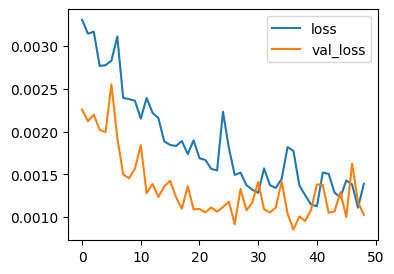

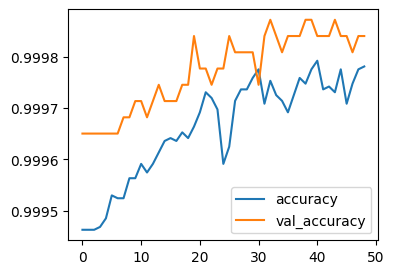

In [7]:
dense_model = prediction_models.Dense_NN(train_combined, conv1d_layers=[[64,48],[32,32]], dense_layers=[64,32], l2_reg=0.0, mixed_dropout=0.0, lr_scheduler=[30000,0.8], seed=0)
#dense_model = prediction_models.CNN(train_combined, conv_layers=[[64,6],[64,3],[64,3]], l2_reg=0.001, mixed_dropout=0.15, lr_scheduler=[20000,0.8], seed=0)

dense_model.summary()
hist = dense_model.fit(train_combined, val_ds=val_combined, epochs=50, verbose=1, plot_hist=False, callbacks=[])
dense_model.model.save('tmp_model.hdf5')

dense_model.plot_hist(hist, [k for k in hist.history.keys() if 'loss' in k])
dense_model.plot_hist(hist, [k for k in hist.history.keys() if 'accuracy' in k])

In [8]:
def localization_eval(ds_gen, gt_path, model, train=True, add_initial_node=False):

    t_ds, v_ds = ds_gen.get_datasets(512, label_features=label_features, shuffle=False, keep_identifier=True)
    ds = t_ds if train else v_ds

    ground_truth_labels = pd.concat([split_dataframes[k] for k in ds_gen.train_keys + ds_gen.val_keys])[['ObjectID', 'TimeIndex', 'EW_Node', 'EW_Type']].rename(columns={'EW_Node' : 'Node', 'EW_Type' : 'Type'})
    ground_truth_labels['Direction'] = 'EW' # For now just EW, see line above
    ground_truth_labels = ground_truth_labels[(ground_truth_labels['Direction'] == 'EW')]

    inputs = np.concatenate([element for element in ds.map(lambda x,y,z: x).as_numpy_iterator()])
    labels = np.concatenate([element['EW_Node_Location'] for element in ds.map(lambda x,y,z: y).as_numpy_iterator()])
    identifiers = np.concatenate([element for element in ds.map(lambda x,y,z: z).as_numpy_iterator()])

    # get predictions
    preds = model.predict(inputs)
    preds_argmax = np.argmax(preds, axis=1)

    df = pd.DataFrame(np.concatenate([identifiers.reshape(-1,2)], axis=1), columns=['ObjectID', 'TimeIndex'], dtype=np.int32)
    df['Location'] = labels
    df[f'Location_Pred'] = preds_argmax

    # add initial node prediction
    if add_initial_node:
        for obj in ds_gen.train_keys if train else ds_gen.val_keys:
            df = df.sort_index()
            df.loc[-1] = [int(obj), 0, 1, 1] # objid, timeindex, location, location_pred
            df.index = df.index + 1
            df = df.sort_index()
    
    df_filtered = df.loc[(df['Location_Pred'] == 1)]
    df_filtered = df_filtered.sort_values(['ObjectID', 'TimeIndex']).reset_index(drop=True)    

    # now, assign the real label to the locations
    mergeDf = df_filtered.merge(ground_truth_labels, how='left', on = ['ObjectID', 'TimeIndex'])

    ground_truth_from_file = pd.read_csv(gt_path).sort_values(['ObjectID', 'TimeIndex']).reset_index(drop=True)
    ground_truth_from_file = ground_truth_from_file[ground_truth_from_file['ObjectID'].isin(map(int, ds_gen.train_keys if train else ds_gen.val_keys))].copy()
    ground_truth_from_file = ground_truth_from_file[(ground_truth_from_file['Direction'] == 'EW')]

    evaluator = evaluation.NodeDetectionEvaluator(ground_truth_from_file, mergeDf)
    precision, recall, f2, rmse, total_tp, total_fp, total_fn = evaluator.score()
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F2: {f2:.2f}')
    print(f'RMSE: {rmse:.4}')
    print(f'TP: {total_tp} FP: {total_fp} FN: {total_fn}')

    return df.loc[(df['Location'] == 1) | (df['Location_Pred'] == 1)].merge(ground_truth_labels, how='left', on = ['ObjectID', 'TimeIndex'])

In [9]:
eval_df = localization_eval(ds_gen, challenge_data_dir / 'train_labels.csv', dense_model.model, train=False, add_initial_node=True)
# print(eval_df.head(50))

984/984 [==============================] - 5s 4ms/step
Precision: 0.92
Recall: 0.88
F2: 0.89
RMSE: 0.2085
TP: 23 FP: 2 FN: 3


In [10]:
eval_df = localization_eval(ds_gen, challenge_data_dir / 'train_labels.csv', dense_model.model, train=True, add_initial_node=True)

2024-01-06 23:47:48.838844: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1028534400 exceeds 10% of free system memory.


In [10]:
false_preds = eval_df.loc[(eval_df['Location'] != eval_df['Location_Pred'])].sort_values(['ObjectID', 'TimeIndex']).reset_index(drop=True)
print(false_preds.head(80))
false_preds = eval_df[eval_df['Location'] != eval_df['Location_Pred']]
print(len(false_preds))
print(len(eval_df))

    ObjectID  TimeIndex  Location  Location_Pred Node Type Direction
0        106         69         0              1   AD   NK        EW
1        108        179         0              1   SS   NK        EW
2        114        201         0              1   AD   NK        EW
3        116        201         0              1   AD   NK        EW
4        117        461         0              1   AD   NK        EW
5        123        125         0              1   AD   NK        EW
6        124        367         0              1   AD   NK        EW
7        129        972         1              0   IK   CK        EW
8        130         86         1              0   IK   CK        EW
9        131        155         0              1   AD   NK        EW
10       135        936         1              0   IK   CK        EW
11       139       1009         1              0   AD   NK        EW
12       139       1098         1              0   IK   CK        EW
13       141        157         1 